In [2]:
# Handwritten Number Detection with MNIST Dataset
# Problem Statement: Train a model which can recognize handwritten numbers 
# We use the deep learning for pattern recognition and image classification


# import and load the mnist dataset from keras
from tensorflow.keras.datasets import mnist



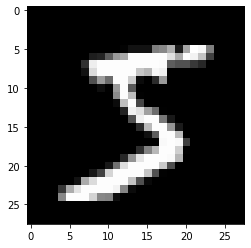

In [3]:

# Split the data between training and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
# x_train: Images used for training the neural network
# y_train: Correct labels for the x_train images, used to evaluate the model's predictions during training
# x_valid: Images set aside for validating the performance of the model after it has been trained
# y_valid: Correct labels for the x_valid images, used to evaluate the model's predictions after it has been 

# We can see any dataset as image
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')



In [4]:
# the above first training image is made using array grayscale values of 
# it looks like this
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# size of array can be easily determined with
x_train[0].shape

(28, 28)

In [6]:
# We can see the max value and min value of x_train and x_valid 
print(x_train.max(),x_valid.max())
print(x_train.min(),x_valid.min())

255 255
0 0


In [7]:
# To train the model we have to transform the input to desired state, for
# this particular problem, we first flatten the 28x28 image to 784x1,
x_train = x_train.reshape(len(x_train), 784)
x_valid = x_valid.reshape(len(x_valid), 784)



In [8]:
print(x_train.shape)
x_train[0]

(60000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
# then we normalize the values from range (0-255) to (0-1)
x_train = x_train / 255
x_valid = x_valid / 255 

In [10]:
# new max and min of the flattened image
print(x_train.max(),x_valid.max())
print(x_train.min(),x_valid.min())

1.0 1.0
0.0 0.0


In [11]:
#  A look on Y datasets which represent correct label for input image sets
print(y_train[0:9],y_valid[0:9])


[5 0 4 1 9 2 1 3 1] [7 2 1 0 4 1 4 9 5]


In [12]:
# We know there are 10 possible categories in each output dataset
#  y_train and y_valid  because numbers can be only from 0-9
# so we have to categorize the dataset
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [13]:
# With data prepared now we create the model
# model will consists of input layer which recieve data in expected format
# several hidden layers and an output layer

# Instantianting the model
from tensorflow.keras.models import Sequential

model = Sequential()

In [14]:
# Creating input layer which will be dense layer
# Dense means each input connected to all neurons
from tensorflow.keras.layers import Dense
#add a dense layer with 512 neurons and 784 input values
model.add(Dense(units=512, activation='relu', input_shape=(784,))) 

In [15]:
# Creating a hidden layer
# add another intermediate dense layer with 512 neurons
model.add(Dense(units = 512, activation='relu')) 

In [16]:
# Create an Output layer
# add a dense output layer with 10 values
model.add(Dense(units = 10, activation='softmax'))

In [17]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Now we compile the model with accuracy as metrics with categorica_crossentropy
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# training the model
# epochs means number of iterations
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1922 - accuracy: 0.9433 - val_loss: 0.1273 - val_accuracy: 0.9628
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1024 - accuracy: 0.9740 - val_loss: 0.1242 - val_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0859 - accuracy: 0.9790 - val_loss: 0.1035 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0741 - accuracy: 0.9830 - val_loss: 0.1129 - val_accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0660 - accuracy: 0.9858 - val_loss: 0.1421 - val_accuracy: 0.9784


In [20]:
history.history

{'loss': [0.19218723475933075,
  0.10236136615276337,
  0.08589144051074982,
  0.07405287772417068,
  0.06598351895809174],
 'accuracy': [0.9432500004768372,
  0.9740333557128906,
  0.9789999723434448,
  0.9829999804496765,
  0.9858333468437195],
 'val_loss': [0.12727588415145874,
  0.12416080385446548,
  0.1035262793302536,
  0.11289133131504059,
  0.1420680284500122],
 'val_accuracy': [0.9628000259399414,
  0.97079998254776,
  0.9779999852180481,
  0.9768000245094299,
  0.9783999919891357]}

In [21]:
results = model.evaluate(x_train, y_train, batch_size=128)

469/469 [==============================] - 3s 6ms/step - loss: 0.0363 - accuracy: 0.9914


In [28]:
# Checking the model
prediction = model.predict(x_train[13:14])
# index in prediction array is the predicted number and value at index contains probability of number 
print(prediction)


1/1 [==============================] - 0s 20ms/step
[[4.6571069e-31 7.7685931e-26 5.4726531e-24 8.1506675e-28 2.5376187e-20
  2.8105133e-15 1.0000000e+00 3.9485040e-30 3.4161801e-23 3.6415346e-28]]


In [31]:
print("Confirmed value from training set: "+str(y_train[13:14].argmax()))
print("value predicted from the model:", prediction.argmax())

Confirmed value from training set: 6
value predicted from the model: 6
